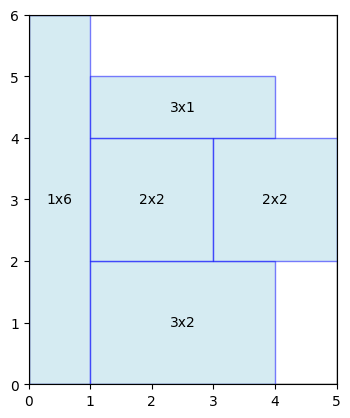

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def find_arrangment(rectangles, K, Q):
    # Sort rectangles by height (or width) in descending order
    rectangles.sort(key=lambda x: x[1], reverse=True)

    # Helper function to check if a rectangle fits in a given position
    def does_fit(x, y, w, h, placed_rects):
        if x + w > K or y + h > Q:
            return False
        for px, py, pw, ph in placed_rects:
            if not (x + w <= px or px + pw <= x or y + h <= py or py + ph <= y):
                return False
        return True

    # Recursive function to try placing rectangles
    def place_rectangles(index, placed_rects):
        if index == len(rectangles):
            return placed_rects

        w, h = rectangles[index]
        for y in range(Q - h + 1):
            for x in range(K - w + 1):
                if does_fit(x, y, w, h, placed_rects):
                    result = place_rectangles(index + 1, placed_rects + [(x, y, w, h)])
                    if result is not None:
                        return result
        return None

    result = place_rectangles(0, [])
    return result if result is not None else "No arrangement possible"


def plot_arrangement(rectangles, K, Q, arrangement):
    fig, ax = plt.subplots()
    ax.set_xlim(0, K)
    ax.set_ylim(0, Q)

    # Draw the large rectangle
    large_rect = patches.Rectangle((0, 0), K, Q, edgecolor='black', facecolor='none')
    ax.add_patch(large_rect)

    # Draw each rectangle in the arrangement
    for (x, y, w, h) in arrangement:
        rect = patches.Rectangle((x, y), w, h, edgecolor='blue', facecolor='lightblue', alpha=0.5)
        ax.add_patch(rect)
        plt.text(x + w/2, y + h/2, f'{w}x{h}', ha='center', va='center')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# # Example rectangles and arrangement from the function
# rectangles = [(3, 2), (1, 6), (2, 2), (3, 1), (2, 2)]
# K = 3
# Q = 1

# Example usage
rectangles = [(3, 2), (1, 6), (2, 2), (3, 1), (2, 2)]  # (width, height)
K = 5
Q = 6
arrangement = find_arrangment(rectangles, K, Q)

# Visualize the result
if arrangement != "No arrangement possible":
    # Visualize the result
    plot_arrangement(rectangles, K, Q, arrangement)
else:
    print(arrangement)